In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# [Pandas](https://pandas.pydata.org)
Pandas简介:以Numpy为基础,提供了数据处理的函数和方法,结合Matplotlib,进行数据可视化展示.
两个核心数据类型
* `Series`(数据系列,一维)
* `DataFrame`(数据框,二维)

## DataFrame

### 通过二维数组创建DF

In [4]:
courses = ['语','数','英']
ids = [_ for _ in range(1001,1006)]
scores = np.random.randint(60,101,(5,3))
df1 = pd.DataFrame(data=scores,index=ids,columns=courses)
df1

,语,数,英
1001,69,66,85
1002,96,70,73
1003,78,68,68
1004,78,94,89
1005,83,85,97


### 通过字典创建

In [10]:
scores ={
    '语':np.random.randint(60,101,5).tolist(),
    '数':np.random.randint(60,101,5).tolist(),
    '英':np.random.randint(60,101,5).tolist()
}
print(scores)
ids = [_ for _ in range(1001,1006)]
df2 = pd.DataFrame(data=scores, index=ids)
df2

{'语': [75, 75, 67, 95, 75], '数': [68, 79, 90, 71, 81], '英': [77, 63, 82, 76, 67]}


,语,数,英
1001,75,68,77
1002,75,79,63
1003,67,90,82
1004,95,71,76
1005,75,81,67


### pandas处理日期

In [5]:
dates=pd.date_range('20200101',periods=6)# pandas处理日期
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [67]:
dataframe2=pd.DataFrame(np.random.randn(6,4))
dataframe2

,0,1,2,3
0,-0.211503,2.928268,-1.322111,-1.187046
1,1.088503,1.685135,0.769677,-0.560567
2,2.454717,0.605607,-0.860714,-0.697368
3,-0.249977,1.368452,-1.013128,0.420772
4,0.270808,-1.003096,-0.160728,0.191057
5,-0.283846,-0.656593,-0.866140,0.694363


In [11]:
# 指定行列的标签
dataframe1=pd.DataFrame(np.random.randn(6,4),index=dates,columns=['随机的1','随机的2','随机的3','随机的4'])
dataframe1

,随机的1,随机的2,随机的3,随机的4
2020-01-01,0.185312,-1.216725,-1.882019,0.885951
2020-01-02,-1.148477,0.461542,-0.797025,-1.089400
2020-01-03,0.809992,0.468062,-0.365549,-0.252809
2020-01-04,-0.129881,-0.609299,-0.713573,0.026165
2020-01-05,0.498506,0.937427,0.962913,0.106590
2020-01-06,2.413853,-0.983792,1.017281,1.304562


## 输出及赋值

#### 从数据库中加载数据

In [40]:
import pymysql

conn = pymysql.connect(
    host='47.104.31.138', port=3306,
    user='guest', password='Guest.618',
    database='hrs', charset='utf8mb4'
)
dept_df = pd.read_sql('select * from tb_dept', conn, index_col='dno')
emp_df = pd.read_sql('select * from tb_emp', conn, index_col='eno')
emp2_df = pd.read_sql('select * from tb_emp2', conn, index_col='eno')

### DataFrame对象的属性如下表所示

| 属性名            | 说明                      |
|----------------|-------------------------|
| `at` / `iat`   | 通过标签获取`DataFrame`中的单个值。 |
| `columns`      | `DataFrame`对象列的索引       |
| `dtypes`       | `DataFrame`对象每一列的数据类型   |
| `empty`        | `DataFrame`对象是否为空       |
| `loc` / `iloc` | 通过标签获取`DataFrame`中的一组值。 |
| `ndim`         | `DataFrame`对象的维度        |
| `shape`        | `DataFrame`对象的形状（行数和列数） |
| `size`         | `DataFrame`对象中元素的个数     |
| `values`       | `DataFrame`对象的数据对应的二维数组 |

关于DataFrame的方法，首先需要了解的是`info()`方法，它可以帮助我们了解DataFrame的相关信息，如下所示。

In [45]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1359 to 7800
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ename   14 non-null     object 
 1   job     14 non-null     object 
 2   mgr     13 non-null     float64
 3   sal     14 non-null     int64  
 4   comm    6 non-null      float64
 5   dno     14 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 784.0+ bytes


In [47]:
emp_df.head(5) #查看前5行的数据
emp_df.tail(3) #查看后三行的数据

,ename,job,mgr,sal,comm,dno
eno,,,,,,
5234,郭靖,出纳,5566.0,2000,NaN,10
5566,宋远桥,会计师,7800.0,4000,1000.0,10
7800,张三丰,总裁,NaN,9000,1200.0,20


### 读取某一列

In [48]:
emp_df.ename

eno
1359    胡一刀 
2056      乔峰
3088     李莫愁
3211     张无忌
3233     丘处机
3244     欧阳锋
3251     张翠山
3344      黄蓉
3577      杨过
3588     朱九真
4466     苗人凤
5234      郭靖
5566     宋远桥
7800     张三丰
Name: ename, dtype: object

### 读取某一行
#### loc[] 根据标签进行输出


In [56]:
# 根据行列标签筛选输出
emp_df.loc[[3211,3233],['ename','job']]

,ename,job
eno,,
3211,张无忌,程序员
3233,丘处机,程序员


### iloc[] 根据坐标进行输出

In [57]:
emp_df.iloc[2]

ename       李莫愁
job         设计师
mgr      2056.0
sal        3500
comm      800.0
dno          20
Name: 3088, dtype: object

In [59]:
# 切片
emp_df.iloc[2:4]

,ename,job,mgr,sal,comm,dno
eno,,,,,,
3088,李莫愁,设计师,2056.0,3500,800.0,20
3211,张无忌,程序员,2056.0,3200,NaN,20


In [60]:
emp_df.iloc[2:4,1]

eno
3088    设计师
3211    程序员
Name: job, dtype: object

### 内容筛选输出

In [79]:
emp_df[(emp_df.job == '会计')]

,ename,job,mgr,sal,comm,dno
eno,,,,,,
3577,杨过,会计,5566.0,2200,NaN,10
3588,朱九真,会计,5566.0,2500,NaN,10


In [94]:
emp_df[(emp_df.job == '会计') & (emp_df.sal > 2200)]

,ename,job,mgr,sal,comm,dno
eno,,,,,,
3588,朱九真,会计,5566.0,2500,NaN,10


### !!!利用query()方法实现数据筛选
参数是一个字符串，它代表了筛选数据使用的表达式，而且更符合 Python 程序员的使用习惯。

In [98]:
emp_df.query("job == '会计' and sal > 2200")

,ename,job,mgr,sal,comm,dno
eno,,,,,,
3588,朱九真,会计,5566.0,2500,NaN,10


输出的时候可以直接进行赋值

### 对存在空值的行或列进行处理

## 空值处理
DataFrame的空值处理与Series相同

In [99]:
# 判断空值,isnull()方法对DataFrame中每个元素内容进行判断
emp_df.isnull()

,ename,job,mgr,sal,comm,dno
eno,,,,,,
1359,False,False,False,False,False,False
2056,False,False,False,False,False,False
3088,False,False,False,False,False,False
3211,False,False,False,False,True,False
3233,False,False,False,False,True,False
3244,False,False,False,False,True,False
3251,False,False,False,False,True,False
3344,False,False,False,False,False,False
3577,False,False,False,False,True,False


## 利用pandas进行导入与导出操作

### 从CSV文件读取DataFrame对象
利用read_csv()
重要参数如下
- `sep` / `delimiter`：分隔符，默认是`,`。
- `header`：表头（列索引）的位置，默认值是`infer`，用第一行的内容作为表头（列索引）。
- `index_col`：用作行索引（标签）的列。
- `usecols`：需要加载的列，可以使用序号或者列名。
- `true_values` / `false_values`：哪些值被视为布尔值`True` / `False`。
- `skiprows`：通过行号、索引或函数指定需要跳过的行。
- `skipfooter`：要跳过的末尾行数。
- `nrows`：需要读取的行数。
- `na_values`：哪些值被视为空值。


In [ ]:
student_data=pd.read_csv('res/student.csv',true_values=['Male'],false_values=['Female'],index_col='Student ID')
student_data

In [ ]:
dataframe1.to_csv('res/test.csv',encoding='utf_8_sig')


### 从EXCEL中读取DataFrame对象
read_excel()方法,多了一个sheet_name参数来指定数据表的名称，但是不同于 CSV 文件，没有sep或delimiter这样的参数。下面的代码中，read_excel函数的skiprows参数是一个 Lambda 函数，通过该 Lambda 函数指定只读取 Excel 文件的表头和其中10%的数据，跳过其他的数据。

In [38]:
testDF= pd.read_excel(
    io='res/EXCEL_test.xlsx',
    usecols = ['序号','账号','密码','姓名','account','password'],
    header= 2
)
testDF

,序号,账号,密码,姓名,account,password
0,1,wangbaoxia04516,DKce62286,王宝霞,tianguanfu6161,Amju6385#
1,2,lanzijun04591,HDje62223,蓝子俊,maorui1jun661,NaN
2,3,wangwenxu04611,EPlu05625,王文旭,lubos3han661,NaN
3,4,pengyutong04621,44,彭雨彤,jizheng661,NaN
4,5,yufang04631,123,于放,shaxiangfeng661,NaN


### 从数据库中读取DataFrame

In [36]:
import pymysql
# 创建一个MySQL数据库的连接对象
conn = pymysql.connect(
    host='47.104.31.138', port=3306,
    user='guest', password='Guest.618',
    database='hrs', charset='utf8mb4'
)
# 通过SQL从数据库读取数据创建DataFrame
dept_df = pd.read_sql('select * from tb_dept', conn, index_col='dno')
emp_df = pd.read_sql('select * from tb_emp', conn, index_col='eno')
emp2_df = pd.read_sql('select * from tb_emp2', conn, index_col='eno')

## 合并与分割

### 合并concat

In [100]:
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df3=pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])
# print(df1)

In [102]:
# 忽视掉序列号
res=pd.concat([df1,df2,df3],axis=0,ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


### 连接join(outer与inner)

In [ ]:
#使用不同标签的列进行合并
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'],index=[1,2,3])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['b','c','d','e'],index=[2,3,4])
df1

In [ ]:
df2

In [ ]:
res=pd.concat([df1,df2],join='outer')
res

In [ ]:
res=pd.concat([df1,df2],join='inner')
res=pd.concat([df1,df2],join='inner',ignore_index=True)
res

### 通过append()添加Series

In [ ]:
series1=pd.Series([1,2,3,4],index=['a','b','c','d'])
res=df1.append(series1,ignore_index=True)
res

### merge()进行合并

#### 根据一个key进行合并

In [ ]:
# 通过字典的形式进行创建dataframe
df_left=pd.DataFrame({'key':['K0','aa','K2','K3'],
                      'A':['A0','A1','A2','A3'],
                      'B':['B0','B1','B2','B3']
                     })
df_right=pd.DataFrame({'key':['K0','bb','K2','K3'],
                      'C':['C0','C1','C2','C3'],
                      'D':['D0','D1','D2','D3']
                     })

In [ ]:
df_right

In [ ]:
res=pd.merge(df_left,df_right,on='key')# 仅合并相同的部分
res

#### 根据多个key进行合并

In [ ]:
df_left=pd.DataFrame({'key1':['K0','aa','K2','K3'],
                      'key2':['K1','K2','K5','K3'],
                      'A':['A0','A1','A2','A3'],
                      'B':['B0','B1','B2','B3']
                     })
df_right=pd.DataFrame({'key1':['K0','bb','K2','K3'],
                       'key2':['K1','K0','K0','K0'],
                      'C':['C0','C1','C2','C3'],
                      'D':['D0','D1','D2','D3']
                     })

In [ ]:
res=pd.merge(df_left,df_right,on=['key1','key2']) #默认为how='inner'
res

In [ ]:
res=pd.merge(df_left,df_right,on=['key1','key2'],how='right') 
res

In [ ]:
res=pd.merge(df_left,df_right,on=['key1','key2'],how='left') 
res

In [ ]:
res=pd.merge(df_left,df_right,on=['key1','key2'],how='outer',indicator='indicator_column') # 添加指示器并对指示器命名
res

#### 根据index进行合并

In [ ]:
df_left=pd.DataFrame({'A':['A0','A1','A2','A3'],
                      'B':['B0','B1','B2','B3']},
                     index=['K0','aa','K2','K3'],)
df_right=pd.DataFrame({'C':['C0','C1','C2','C3'],
                      'D':['D0','D1','D2','D3']},
                     index=['K0','ab','K4','K3'])

In [ ]:
res=pd.merge(df_left,df_right,left_index=True,right_index=True,how='outer',indicator=True)
res

In [ ]:
df_boys=pd.DataFrame({'年龄':[12,34,12],
                      '班级':[1,2,3]})
df_girls=pd.DataFrame({'班级':[1,2,4],
                     '年龄':[23,13,17]})

In [ ]:
# 输出两个表中相同班级的男孩女孩，并在年龄后添加后缀
res=pd.merge(df_boys,df_girls,on='班级',suffixes=['_男孩','_女孩'],how='inner')
res

## pandas的数据可视化plot

In [104]:
series1=pd.Series(np.random.randn(1000),index=np.arange(1000)) 
series1[:10]

0   -0.839630
1   -0.259675
2   -0.557927
3   -0.325140
4   -0.015131
5    0.245846
6   -0.499989
7    0.284506
8    0.688556
9   -2.615733
dtype: float64

<AxesSubplot:>

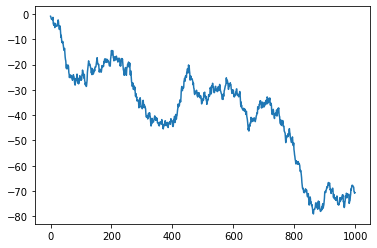

In [105]:
series1=series1.cumsum() # 累加
series1.plot()

UsageError: Line magic function `%%` not found.


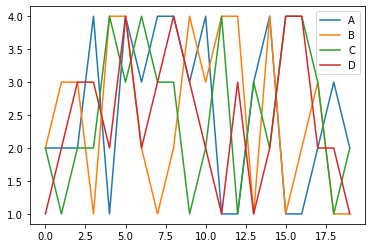

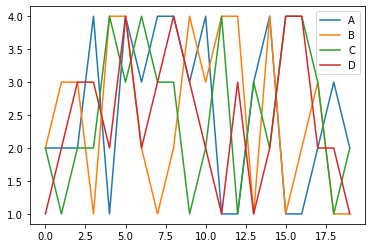

In [111]:
series2=pd.DataFrame(np.random.randint(1,5,(20,4)),index=np.arange(20),columns=list('ABCD'))
series2.plot()

series2.cumsum()
series2.plot()
# plot的方法:
    # bar,hist,box,kde,area,scatter,hexbin,pie

<AxesSubplot:xlabel='A', ylabel='C'>

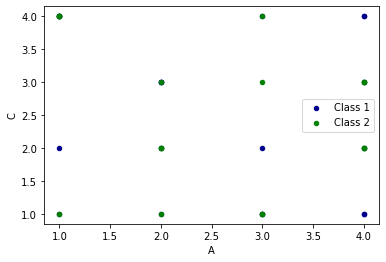

In [112]:
ax=series2.plot.scatter(x='A',y='B',color='DarkBlue',label='Class 1')
series2.plot.scatter(x='A',y='C',color='Green',label='Class 2',ax=ax)

# Finish,完结撒花✌